In [1]:
print('hello world')

hello world


In [2]:
import os
import pandas as pd

In [3]:
df = pd.read_csv('/content/Customertravel.csv')


   Age  FrequentFlyer  AnnualIncomeClass  ServicesOpted  \
0   34              0                  2              6   
1   34              2                  1              5   
2   37              0                  2              3   
3   30              0                  2              2   
4   30              0                  1              1   

  AccountSyncedToSocialMedia BookedHotelOrNot  Target  
0                         No              Yes       0  
1                        Yes               No       1  
2                        Yes               No       0  
3                         No               No       0  
4                         No               No       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 

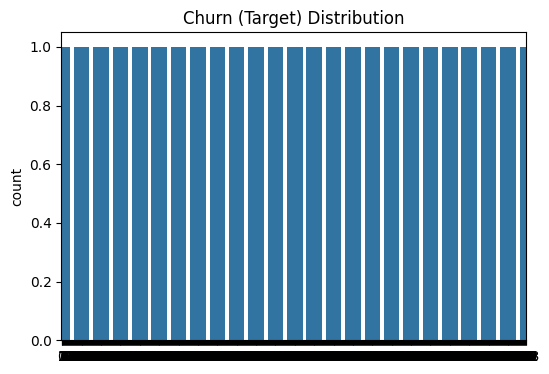

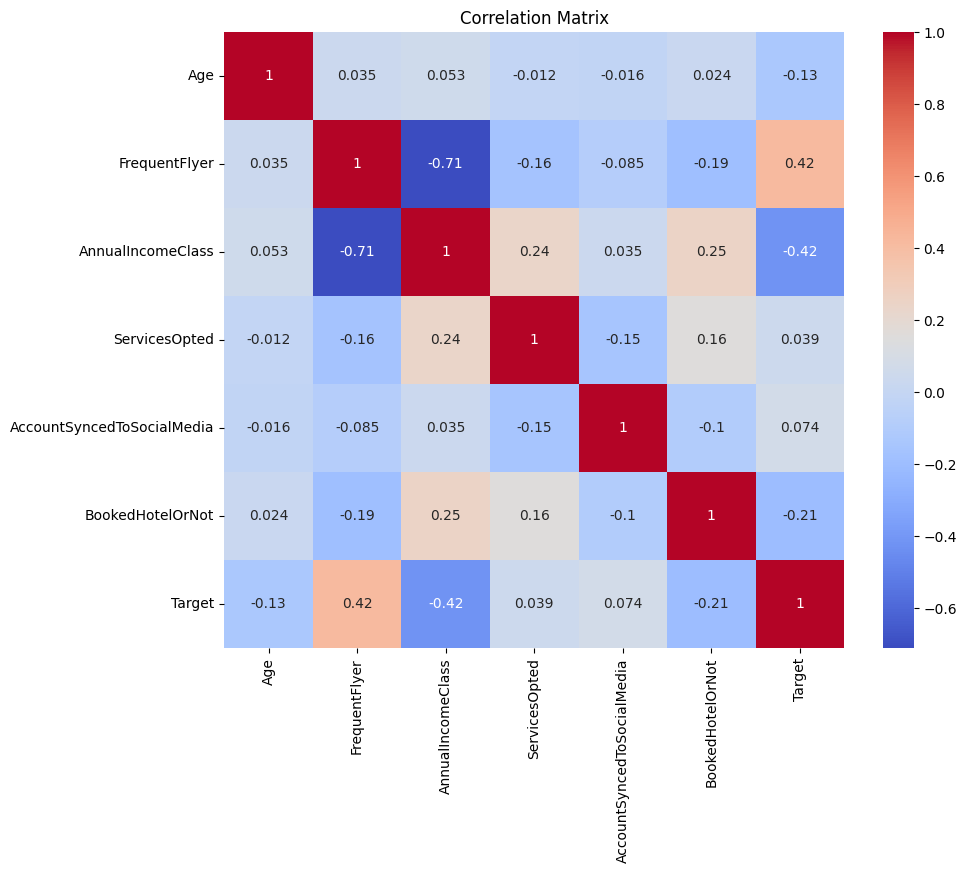

Accuracy: 0.8432055749128919
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       219
           1       0.77      0.49      0.59        68

    accuracy                           0.84       287
   macro avg       0.81      0.72      0.75       287
weighted avg       0.84      0.84      0.83       287



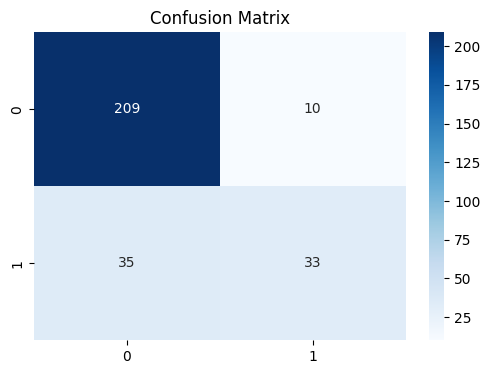

Random Forest Accuracy: 0.8780487804878049
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       219
           1       0.79      0.66      0.72        68

    accuracy                           0.88       287
   macro avg       0.84      0.80      0.82       287
weighted avg       0.87      0.88      0.87       287



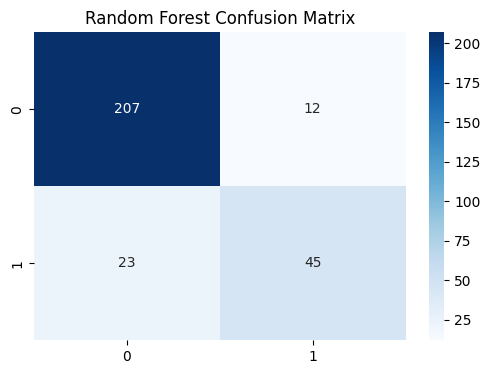

In [8]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Display basic information about the dataset
print(df.head())  # View the first few rows
print(df.info())  # Check data types and missing values
print(df.describe())  # Summary statistics of numerical features

# Step 2: Handle missing values (if any)
print(df.isnull().sum())  # Check for missing values
df.dropna(inplace=True)  # Drop missing values (or use other imputation methods)

# Step 3: Encode categorical variables
# Columns to encode: 'FrequentFlyer', 'AnnualIncomeClass', 'AccountSyncedToSocialMedia', 'BookedHotelOrNot'
le = LabelEncoder()
df['FrequentFlyer'] = le.fit_transform(df['FrequentFlyer'])
df['AnnualIncomeClass'] = le.fit_transform(df['AnnualIncomeClass'])
df['AccountSyncedToSocialMedia'] = le.fit_transform(df['AccountSyncedToSocialMedia'])
df['BookedHotelOrNot'] = le.fit_transform(df['BookedHotelOrNot'])

# Step 4: Visualize target variable (Churn/Target)
plt.figure(figsize=(6, 4))
sns.countplot(df['Target'])
plt.title('Churn (Target) Distribution')
plt.show()

# Step 5: Correlation Heatmap for feature relationships
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 6: Feature and target separation
X = df.drop('Target', axis=1)  # Features
y = df['Target']  # Target variable (Churn)

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 8: Standardize numerical features (optional but recommended for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 9: Model Building - Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Step 10: Predictions and Evaluation
y_pred = log_reg.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Step 11: Model Building - Random Forest (optional but recommended)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Random Forest Predictions and Evaluation
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Random Forest Classification Report
print(classification_report(y_test, y_pred_rf))

# Random Forest Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()
